In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [37]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import LogisticRegression;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsRegressor;
from sklearn.naive_bayes import GaussianNB;
import xgboost as xgb;
from xgboost import XGBClassifier;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor

import tensorflow as tf
import keras;
from keras_preprocessing import image;
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam;
from keras.callbacks import ModelCheckpoint;
from keras.models import Sequential;
from tensorflow.keras.applications import VGG16;
from tensorflow.keras.applications import InceptionResNetV2;
from keras.applications.vgg16 import preprocess_input;
from tensorflow.keras.applications.vgg16 import decode_predictions;
from tensorflow.keras.callbacks import EarlyStopping;

from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


import os;
from os import listdir;
from PIL import Image as PImage;
import cv2

In [10]:
ss = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip');
ss.head(20)

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
5,1_1_2012-12-07,0
6,1_1_2012-12-14,0
7,1_1_2012-12-21,0
8,1_1_2012-12-28,0
9,1_1_2013-01-04,0


In [50]:
train = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
test = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/test.csv.zip')

In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [11]:
test.head(20)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


In [7]:
features = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/features.csv.zip');
store = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/stores.csv')

In [8]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [27]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [29]:
train.shape, store.shape

((421570, 5), (45, 3))

In [30]:
train.isnull().sum()/train.shape[0]*100

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
dtype: float64

In [31]:
test.isnull().sum()/test.shape[0]*100

Store        0.0
Dept         0.0
Date         0.0
IsHoliday    0.0
dtype: float64

In [51]:
newtrain = train.drop(columns = 'Date', axis =1);
newtest = test.drop(columns = 'Date', axis =1)

In [52]:
newtrain['IsHoliday'].unique()

array([False,  True])

In [53]:
h = {False : 1,  True : 2};
newtrain['IsHoliday'] = newtrain['IsHoliday'].map(h)
newtest['IsHoliday'] = newtest['IsHoliday'].map(h)

In [54]:
newtrain.head()

,Store,Dept,Weekly_Sales,IsHoliday
0,1,1,24924.50,1
1,1,1,46039.49,2
2,1,1,41595.55,1
3,1,1,19403.54,1
4,1,1,21827.90,1


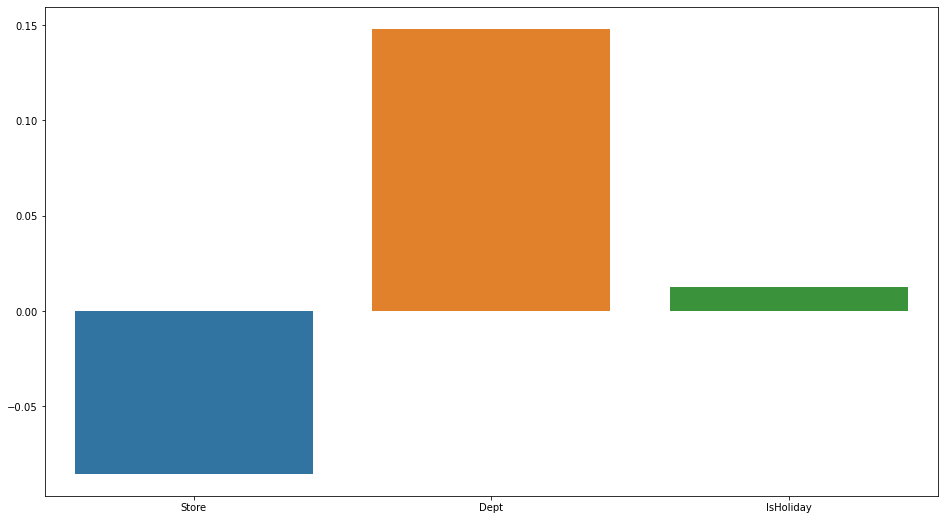

In [55]:

plt.figure(figsize = (16,9))
fineTech_appData3 = newtrain.drop(['Weekly_Sales'], axis = 1) # drop 'enrolled' feature
sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(newtrain['Weekly_Sales']))



In [56]:
newtrain = newtrain.drop(columns = 'IsHoliday', axis = 1);
newtest = newtest.drop(columns = 'IsHoliday', axis = 1);

In [57]:
x = newtrain.drop(columns = 'Weekly_Sales', axis =1);
y = newtrain['Weekly_Sales'];
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 55)

In [58]:
xx=  XGBRegressor();
xx.fit(xtrain, ytrain);
xx.score(xtest, ytest)

0.8831815747080758

In [44]:
xtrain

,Store,Dept,IsHoliday
411815,44,98,NaN
17577,2,67,NaN
6068,1,47,NaN
273354,28,54,NaN
3568,1,27,NaN
...,...,...,...
129565,14,11,NaN
409469,44,72,NaN
82888,9,31,NaN
4762,1,35,NaN


In [59]:
rfc = RandomForestRegressor();
rfc.fit(xtrain, ytrain);
rfc.score(xtest, ytest)

0.9034897472763433

In [67]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators= 10000)
lgb.fit(xtrain,ytrain);
lgb.score(xtest, ytest)

0.9034512837495325

In [63]:
knn = KNeighborsRegressor();
knn.fit(xtrain, ytrain);
knn.score(xtest, ytest)

0.8836662172334856

In [64]:
dc = DecisionTreeRegressor();
dc.fit(xtrain, ytrain);
dc.score(xtest, ytest)

0.9034629886250491

In [68]:
newtest.head()

,Store,Dept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [69]:
model = rfc.predict(newtest);
modelData = pd.DataFrame(model, columns = ['Weekly_Sales']);
modelData.set_index('Weekly_Sales').to_csv('submission.csv')